In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import re

#### Import the data and get a high-level picture

In [13]:
df = pd.read_csv('sales.csv')
df.head()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,3,$10.50
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,1,$3.50
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,$2.50,2,$5.00
3,10001,NaN,2018-01-01 12:14:54,$1.50,1,$1.50
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,$3.50,1,$3.50


In [14]:
df.shape

(29922, 6)

In [15]:
df.dtypes

order_id       int64
name          object
ordered_at    object
price         object
quantity       int64
line_total    object
dtype: object

#### TODO: Fix column datatypes

Change ordered_at to datetime

Change price and line_total to float

In [16]:
df.ordered_at = pd.to_datetime(df.ordered_at)
#new_dates = pd.to_datetime(df.ordered_at)
#df.dtypes

In [17]:
# Remove the $ sign
df['line_total'] = df['line_total'].str.replace("$","")
df['price'] = df['price'].str.replace("$","")

df['line_total'] = pd.to_numeric(df['line_total'])
df['price'] = pd.to_numeric(df['price'])

/var/folders/mx/b2s2fns51plfn__sspbylxk00000gn/T/ipykernel_1037/2072351248.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['line_total'] = df['line_total'].str.replace("$","")
/var/folders/mx/b2s2fns51plfn__sspbylxk00000gn/T/ipykernel_1037/2072351248.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace("$","")


In [18]:
df.dtypes

order_id               int64
name                  object
ordered_at    datetime64[ns]
price                float64
quantity               int64
line_total           float64
dtype: object

#### TODO: drop if duplicated or null

In [19]:
df.drop_duplicates(inplace=True)
df[df.duplicated()].shape[0]
#df['order_id']# 10001 is duplicated
#df['order_id']
#df.sort_values(['order_id'])
#df.value_counts() # unique combination of columns

0

In [20]:
df=df.dropna()
#df.isnull()

In [21]:
df.isnull().sum()

order_id      0
name          0
ordered_at    0
price         0
quantity      0
line_total    0
dtype: int64

In [22]:
df[df['name'].isnull()].head()

,order_id,name,ordered_at,price,quantity,line_total


In [23]:
df.groupby('order_id')

#### Sanity check for value ranges and to check assumptions

In [89]:
df[(df['price'] * df['quantity']) != df['line_total']].shape[0]

0

In [90]:
df[df['line_total'] < 0].shape[0]

0

#### TODO: 
Set line_total = price * quantity if different
Remove if line total < 0

In [24]:
df['line_total'] = df['price'] * df['quantity']
#neg_prices = df['price']<0
#neg_prices = df[df['price']<0]
df = df.loc[df['price'] >0]

#df.drop(df[df['price']<0],axis=0)
df[df['price']<0]

,order_id,name,ordered_at,price,quantity,line_total


In [25]:
df.describe()

,order_id,price,quantity,line_total
count,27624.000000,27624.000000,27624.000000,27624.000000
mean,14993.783051,2.511711,2.000724,5.028743
std,2888.516649,1.059244,0.819432,3.085410
min,10000.000000,0.500000,1.000000,0.500000
25%,12501.750000,1.500000,1.000000,2.500000
50%,14973.000000,2.500000,2.000000,4.500000
75%,17507.000000,3.500000,3.000000,7.500000
max,19999.000000,4.000000,3.000000,12.000000


#### TODO: Get value between "" in name and put it in category column

In [26]:
names = re.findall('"([^"]*)"', 'SetVariables "a" "b" "c" ')
extract = lambda text:re.findall('"([^"]*)"', text)
catergories = df['name'].apply(extract)
#catergories

df['category'] = df['name'].apply(extract)
df['category']
#names = df['name']
#names

#l = names.split('"')[1::2]

/var/folders/mx/b2s2fns51plfn__sspbylxk00000gn/T/ipykernel_1037/1865959382.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category'] = df['name'].apply(extract)


0        [ICE CREAM]
1        [ICE CREAM]
2           [SORBET]
4             [CONE]
5           [SORBET]
            ...     
29817         [CONE]
29818       [SORBET]
29819       [SORBET]
29820    [ICE CREAM]
29821       [SORBET]
Name: category, Length: 27624, dtype: object

In [27]:
df.head()

,order_id,name,ordered_at,price,quantity,line_total,category
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5,[ICE CREAM]
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,1,3.5,[ICE CREAM]
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.5,2,5.0,[SORBET]
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,3.5,1,3.5,[CONE]
5,10002,"""SORBET"" Lychee",2018-01-01 12:23:09,3.0,1,3.0,[SORBET]


#### Analysis, finally!

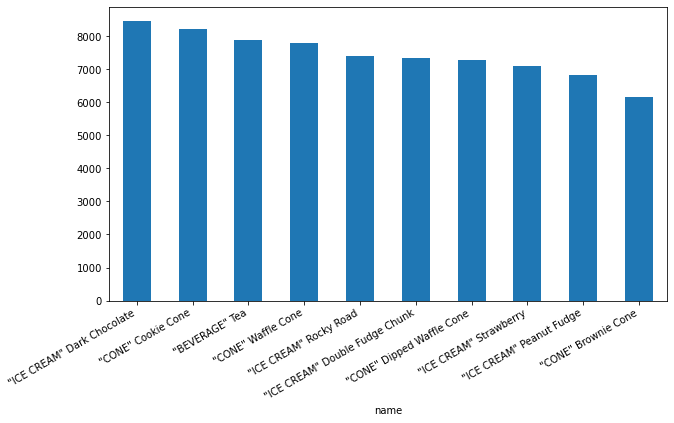

In [28]:
f, ax = plt.subplots(figsize=(10, 6))
df.groupby('name')['line_total'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
f.autofmt_xdate()
plt.show()